In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

pokemon = pd.read_csv('/content/drive/MyDrive/Data Folder /pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


# Example 1 - Scale the x-axis to log-type


Text(0.5, 0, 'The x-axis limits NOT are changed. They are only scaled to log-type')

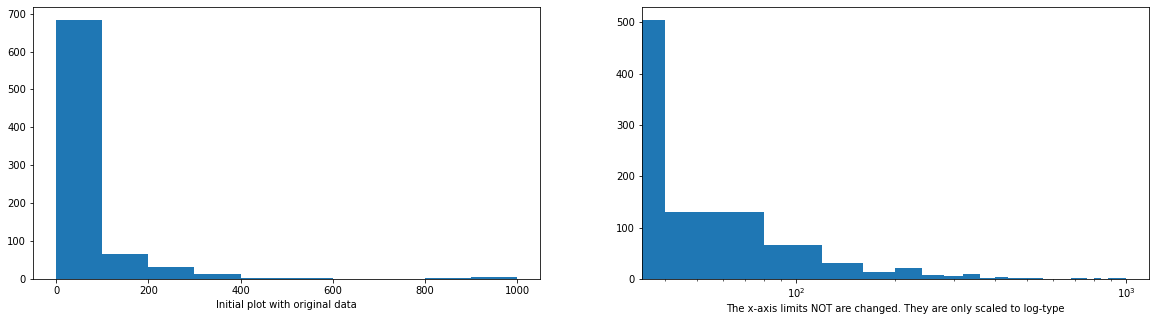

In [ ]:
plt.figure(figsize=[20 , 5])

# HISTOGRAM ON LEFT: full data without scaling
plt.subplot(1 , 2 ,1)
plt.hist(data=pokemon ,x='weight');

# Display a label on the x-axis
plt.xlabel('Initial plot with original data')

# HISTOGRAM ON RIGHT 
plt.subplot(1,2,2)
# Get the ticks for bins between [0 - maximum weight]
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data=pokemon, x='weight', bins=bins);
# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
# Refer - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xscale.html
plt.xscale('log')
plt.xlabel('The x-axis limits NOT are changed. They are only scaled to log-type')

In [ ]:
pokemon['weight'].describe()


count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

# Example 2 - Scale the x-axis to log-type, and change the axis limit.


In [ ]:
# Transform the describe() to a scale of log10
# Documentation: [numpy `log10`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log10.html)
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

Text(0.5, 0, 'x-axis limits are changed, and scaled to log-type')

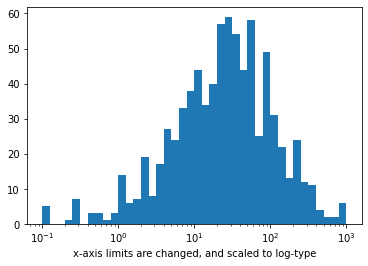

In [ ]:
# Axis transformation
# Bin size
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-axis label
# Documentatin: [matplotlib `xlabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html))
plt.xlabel('x-axis limits are changed, and scaled to log-type')

# Example 3 - Scale the x-axis to log-type, change the axis limits, and increase the x-ticks


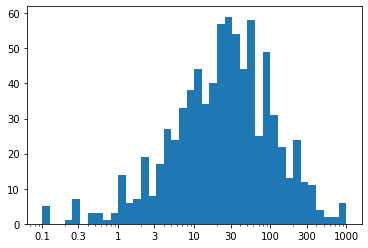

In [ ]:

# Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(-1, 3+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels);

# Alternative Approach
Be aware that a logarithmic transformation is not the only one possible. When we perform a logarithmic transformation, our data values have to all be positive; it's impossible to take a log of zero or a negative number. In addition, the transformation implies that additive steps on the log scale will result in multiplicative changes in the natural scale, an important implication when it comes to data modeling. The type of transformation that you choose may be informed by the context for the data. For example, this Wikipedia section provides a few examples of places where log-normal distributions have been observed.

If you want to use a different transformation that's not available in xscale, then you'll have to perform some feature engineering. In cases like this, we want to be systematic by writing a function that applies both the transformation and its inverse. The inverse will be useful in cases where we specify values in their transformed units and need to get the natural units back. For the purposes of demonstration, let's say that we want to try plotting the above data on a square-root transformation. (Perhaps the numbers represent areas, and we think it makes sense to model the data on a rough estimation of radius, length, or some other 1-d dimension.) We can create a visualization on this transformed scale like this:

# Example 4. Custom scaling the given data Series, instead of using the built-in log scale


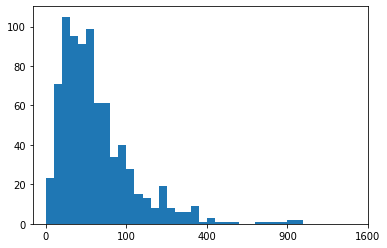

In [ ]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

# Bin resizing, to transform the x-axis    
bin_edges = np.arange(0, sqrt_trans(pokemon['weight'].max())+1, 1)

# Plot the scaled data
plt.hist(pokemon['weight'].apply(sqrt_trans), bins = bin_edges)

# Identify the tick-locations
tick_locs = np.arange(0, sqrt_trans(pokemon['weight'].max())+10, 10)

# Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));